# <center> Lab 4 Examples 
## <center>  More on solve commands, loops and multiplicities
    
Lab 4 will have problems about extrema and inflection points. This requires an ability to solve equations. Since solve commands are not perfect, we need to look at what we can do to get some answers.    

**Video**: https://youtu.be/HJlV6QGAM2Y
    
We start with importing needed libraries.
    
I will also add symbols 'x' for SymPy.


In [2]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from numpy.polynomial import *

sp.var('x')

x

**Example 1**

Consider $f(x)=sin(x^2)$. Let's find some critical points.

In [3]:
f=sp.sin(x**2)
fder=f.diff(x)
fder

2*x*cos(x**2)

In [4]:
sp.solveset(fder,x)

Union(ConditionSet(x, Eq(cos(x**2), 0), Complexes), {0})

As you can see, this is not the best way to see the answer. We can try few things here. One is to solve it using `solve` command. It is simpler command, but it may lead to better looking solution:

In [5]:
sp.solve(fder,x)

[0,
 -sqrt(2)*sqrt(pi)/2,
 sqrt(2)*sqrt(pi)/2,
 -sqrt(6)*sqrt(pi)/2,
 sqrt(6)*sqrt(pi)/2]

These not all of the solutions, but at least it's something. You might have to also graph it to make sure the solutions you got are the ones you want and you are not missing anything.

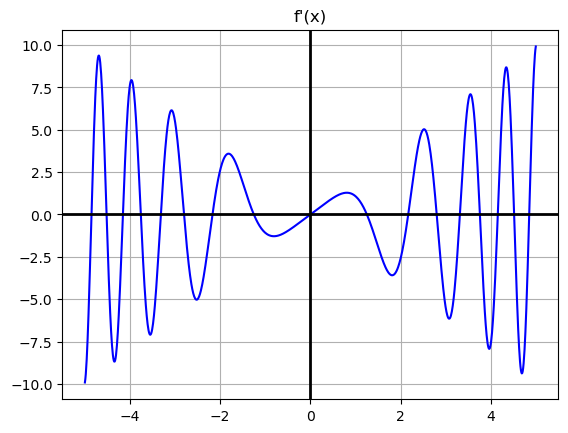

In [6]:
fdern=sp.lambdify(x,fder)
xval=np.linspace(-5,5,1000) 

fig=plt.figure()

plt.plot(xval,fdern(xval), color='blue', label="Function")

plt.axhline(0, color='black', lw=2)   
plt.axvline(0, color='black', lw=2)   

plt.title("f'(x)")
plt.grid()

plt.show()

We can also apply `N` command here to make them into decimal form. If you used `solve`, it is a bit tricky, but you can use for-loop to evaluate all values as follows:

In [7]:
[sp.N(s) for s in sp.solve(fder,x)]

[0, -1.25331413731550, 1.25331413731550, -2.17080376367480, 2.17080376367480]

As you can see we only got the central five solutions.

Another way is to use `nsolve`, but this one really should be used as a last resort since it is only gives one solution or if you need a specific solution that you can get through `solve`. In fact, it works ok only in conjunction with a graph so that you can tell which solution you get.

**Example 2**

Let's try to solve this equation $x^5-3x^3+1=0$

In [8]:
eq=x**5-3*x**3+1
sp.solveset(eq,x)

{CRootOf(x**5 - 3*x**3 + 1, 0), CRootOf(x**5 - 3*x**3 + 1, 1), CRootOf(x**5 - 3*x**3 + 1, 2), CRootOf(x**5 - 3*x**3 + 1, 3), CRootOf(x**5 - 3*x**3 + 1, 4)}

As you can see we didn't get the nice solution. However, `CRootOf` values can be evaluated with `N` command. Moreover, this commands works well with `solveset`

In [9]:
sp.N(sp.solveset(eq,x))

{-1.78230878004588, 0.741813930486773, 1.66877759254038, -0.314141371490635 - 0.595441328269119*I, -0.314141371490635 + 0.595441328269119*I}

We can even improve this a bit. Let's say we only want real solutions, then we can add `domain=sp.S.Reals` to `solveset` command

In [10]:
sp.N(sp.solveset(eq,x, domain=sp.S.Reals))

{-1.78230878004588, 0.741813930486773, 1.66877759254038}

**Example 3**

In this example, we are going to talk about multiplicities.

You should already know how to find multiplicity of a zero of a polynomial. For example, $f(x) = (x−2)^3$
has a zero at $x = 2$ of multiplicity 3. But, what about multiplicity of a $x = 0$ of $f(x) = \sin(x)$? To see what
happens here, we have to redefine the idea of multiplicity as follows:
$$”x = c \text{ is a zero of multiplicity } m \text{ of }f(x) \text{ if } \lim_{x\rightarrow c} \frac{f(x)}{(x − c)^m} \text{ exists and is not zero.}”$$
It should be easy to see that $x = 0$ is a zero of $\sin(x)$ of multiplicity 1, since $\lim_{x \rightarrow 0} \frac{sin(x)}{x}=1$.

Let's use this to find the multiplicity of $x=0$ of $f(x)=e^{-x^2}-1$

In [11]:
f=sp.exp(-x**2)-1

We will start with checking if it is 1:

In [12]:
sp.limit(f/x,x,0,'+-')

0

Hm, it is not 1. In fact, since we got a 0, it means multiplicity of our zero has to be higher. So, let's check 2:

In [13]:
sp.limit(f/x**2,x,0,'+-')

-1

There we go, it is multiplicity 2.

As you can imagine, this might take a few tries if actual multiplicity is high. So let's use some loop to do all those checks automatically. We will create a `for-loop` to go through first 10 multiplicities to check which one is the correct one. Since at first we should be getting zeros, the first time we gen a non-zero response, we have a right answer:

In [14]:
for n in range(1,11,1):
    L=sp.limit(f/x**n,x,0,'+-')
    if L != 0:
        print("multiplicity is",n)
        break    # this command stops for loop.

multiplicity is 2


Let's plot this function to see if it looks like we would expect it

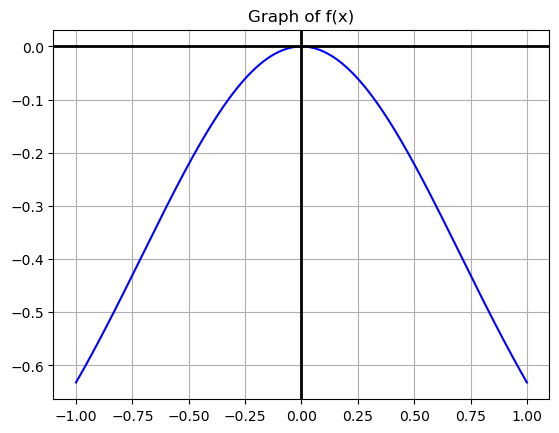

In [15]:
fn=sp.lambdify(x,f)
xval=np.linspace(-1,1,1000) 

fig=plt.figure()

plt.plot(xval,fn(xval), color='blue', label="Function")

plt.axhline(0, color='black', lw=2)   
plt.axvline(0, color='black', lw=2)   


plt.title('Graph of f(x)')
plt.grid()

plt.show()

**Example 4**

Lastly, we can also use `limit` command to find limits at infinity. To do that we can use `sp.oo` or `-sp.oo`.

For example, let $f(x)=arctan(x)$, then limit at $\infty$ is 

In [16]:
f=sp.atan(x)

sp.limit(f,x,sp.oo)

pi/2

And limit at $-\infty$ is

In [17]:
sp.limit(f,x,-sp.oo)

-pi/2